In [1]:
import numpy as np
import pandas as pd
# Reading the CSV file using pandas
file_path = "churn.csv"
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
from scipy.stats import skew, kurtosis

# Reading the CSV file using pandas
file_path = "churn.csv"
df = pd.read_csv(file_path)

# Select the columns for statistical analysis
columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Calculate mean, variance, skewness, and kurtosis for each selected column
mean_values = df[columns_to_analyze].mean().round(2)
variance_values = df[columns_to_analyze].var().round(2)
skewness_values = df[columns_to_analyze].apply(skew).round(2)
kurtosis_values = df[columns_to_analyze].apply(kurtosis).round(2)

# Create a DataFrame to store the results
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Display the results in a table format
print(stats_df)

                      Mean      Variance  Skewness  Kurtosis
CreditScore         650.53  9.341860e+03     -0.07     -0.43
Age                  38.92  1.099900e+02      1.01      1.39
Tenure                5.01  8.360000e+00      0.01     -1.17
Balance           76485.89  3.893436e+09     -0.14     -1.49
NumOfProducts         1.53  3.400000e-01      0.75      0.58
EstimatedSalary  100090.24  3.307457e+09      0.00     -1.18


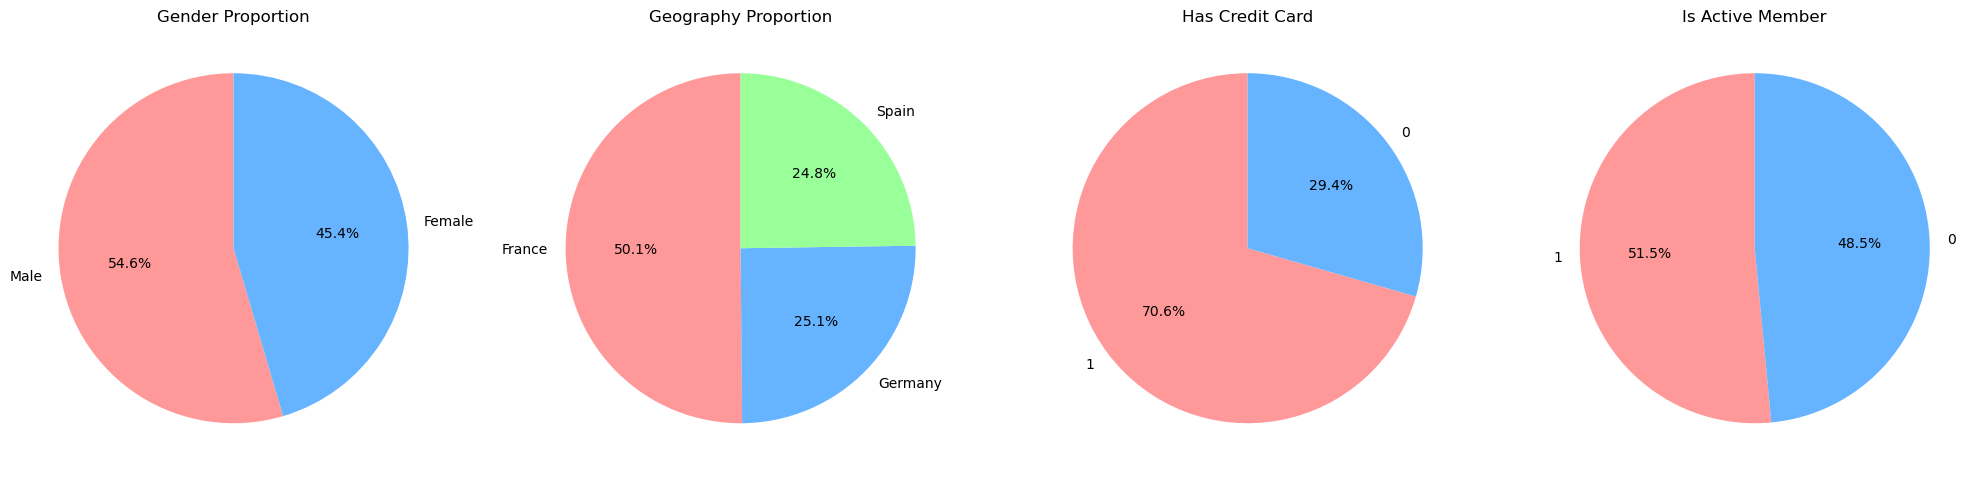

In [3]:
import matplotlib.pyplot as plt

# Set up a 1x4 subplot grid for the pie charts
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Create pie charts for the specified columns
columns = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']
titles = ['Gender Proportion', 'Geography Proportion', 'Has Credit Card', 'Is Active Member']

for i, col in enumerate(columns):
    ax = axs[i]
    data = df[col].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    ax.set_title(titles[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

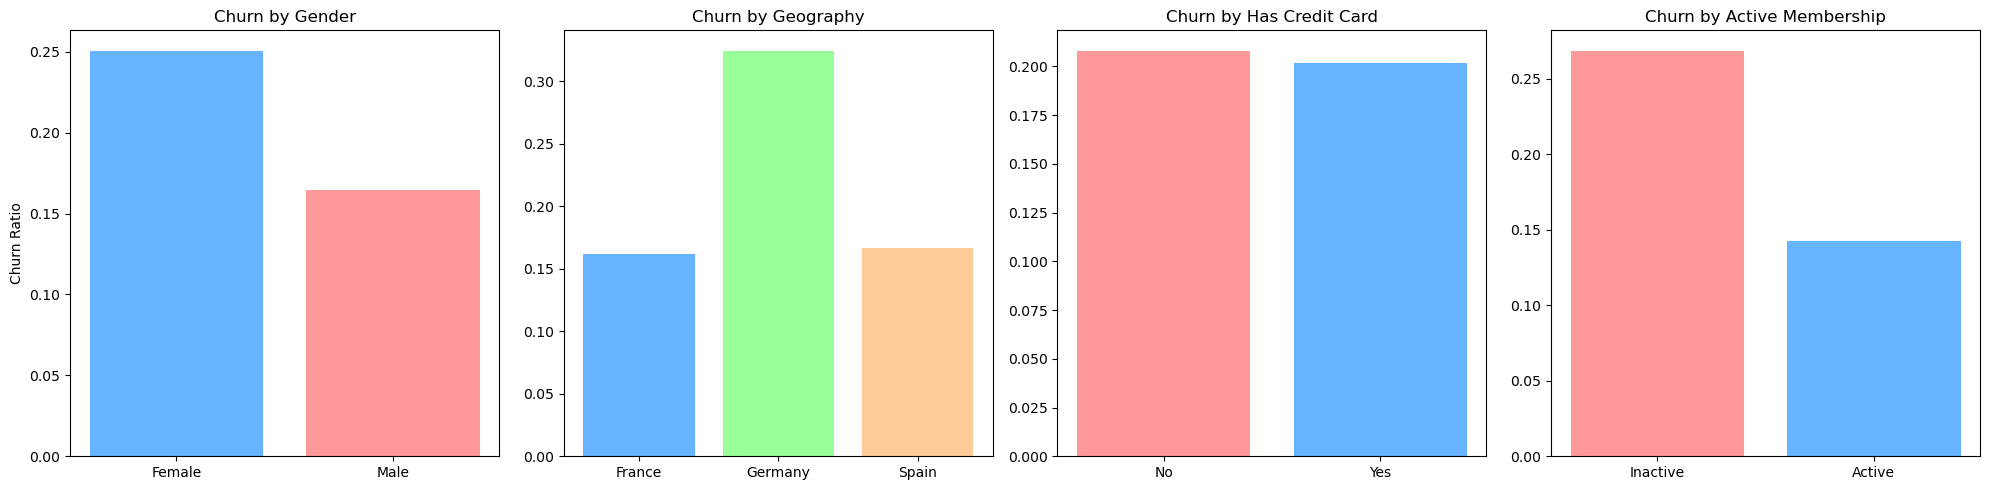

In [4]:
# Function to calculate churn ratio for a given column
def calculate_churn_ratio(df, column):
    churn_data = df.groupby(column)['Exited'].mean()
    return churn_data

# Calculate churn ratios for each category
churn_by_gender = calculate_churn_ratio(df, 'Gender')
churn_by_geography = calculate_churn_ratio(df, 'Geography')
churn_by_cr_card = calculate_churn_ratio(df, 'HasCrCard')
churn_by_active = calculate_churn_ratio(df, 'IsActiveMember')

# Set up a 1x4 subplot grid for separate bar charts
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot churn ratio for Gender
axs[0].bar(churn_by_gender.index, churn_by_gender.values, color=['#66b3ff', '#ff9999'])
axs[0].set_title('Churn by Gender')
axs[0].set_ylabel('Churn Ratio')

# Plot churn ratio for Geography
axs[1].bar(churn_by_geography.index, churn_by_geography.values, color=['#66b3ff', '#99ff99', '#ffcc99'])
axs[1].set_title('Churn by Geography')

# Plot churn ratio for HasCrCard
axs[2].bar(['No', 'Yes'], churn_by_cr_card.values, color=['#ff9999', '#66b3ff'])
axs[2].set_title('Churn by Has Credit Card')

# Plot churn ratio for IsActiveMember
axs[3].bar(['Inactive', 'Active'], churn_by_active.values, color=['#ff9999', '#66b3ff'])
axs[3].set_title('Churn by Active Membership')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

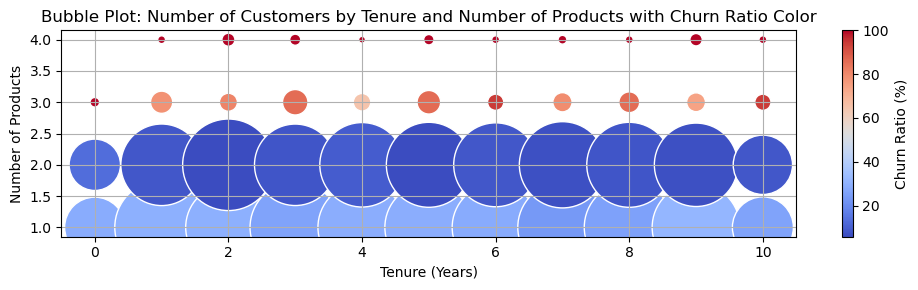

In [5]:
# Calculate the number of people (count) and churn ratio for each combination of Tenure and NumOfProducts
grouped = df.groupby(['Tenure', 'NumOfProducts']).agg(
    Count=('Exited', 'size'),
    ChurnRatio=('Exited', 'mean')
).reset_index()
grouped['ChurnRatio (%)'] = grouped['ChurnRatio'] * 100

# Plot bubble chart
plt.figure(figsize=(10, 3))
bubble_size = grouped['Count'] * 8  # Adjust size scaling factor for better visualization
bubble_color = grouped['ChurnRatio (%)']

scatter = plt.scatter(
    grouped['Tenure'], 
    grouped['NumOfProducts'], 
    s=bubble_size, 
    c=bubble_color, 
    cmap='coolwarm',  # Color map for churn ratio
    alpha=1, 
    edgecolors='w', 
    linewidth=1
)

plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Products')
plt.title('Bubble Plot: Number of Customers by Tenure and Number of Products with Churn Ratio Color')
plt.grid(True)

# Add color bar to represent churn ratio percentage
cbar = plt.colorbar(scatter)
cbar.set_label('Churn Ratio (%)')

plt.tight_layout()
plt.show()

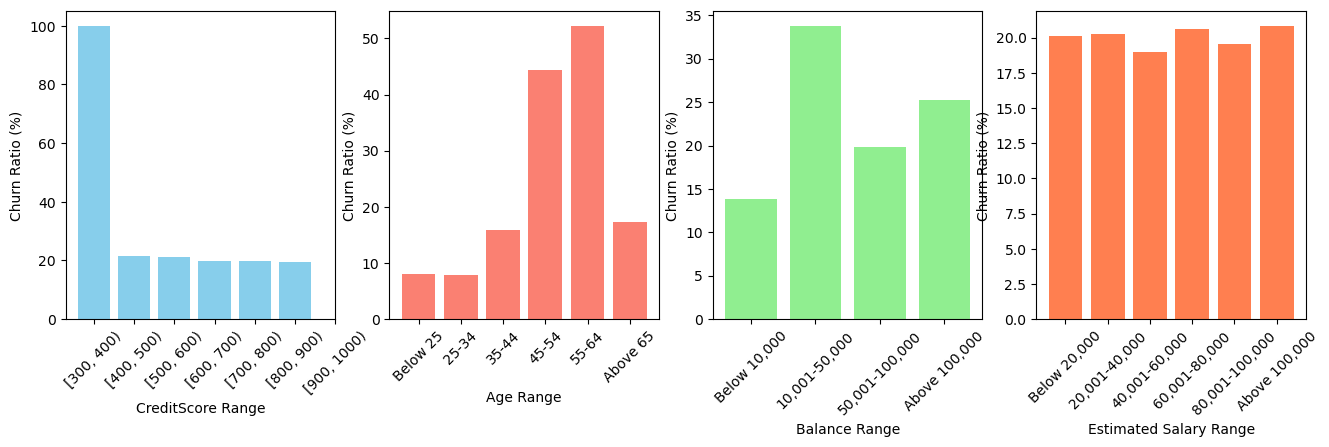

In [6]:
import matplotlib.pyplot as plt

# Function to convert column into classification variable and calculate churn ratio
def calculate_churn_ratio(df, column, bins, labels, new_col_name):
    df[new_col_name] = pd.cut(df[column], bins=bins, labels=labels, right=False)
    churn_ratio = df.groupby(new_col_name)['Exited'].mean() * 100
    return pd.DataFrame(churn_ratio).reset_index().rename(columns={new_col_name: column, 'Exited': 'Churn Ratio (%)'})

# Data classification for CreditScore, Age, Balance, and EstimatedSalary
df_churn_credit_range = calculate_churn_ratio(df, 'CreditScore', bins=range(300, 1001, 100), labels=None, new_col_name='CreditScoreRange')
df_churn_age_group = calculate_churn_ratio(df, 'Age', bins=[0, 24, 34, 44, 54, 64, float('inf')], labels=['Below 25', '25-34', '35-44', '45-54', '55-64', 'Above 65'], new_col_name='AgeGroup')
df_churn_balance_group = calculate_churn_ratio(df, 'Balance', bins=[0, 10000, 50000, 100000, float('inf')], labels=['Below 10,000', '10,001-50,000', '50,001-100,000', 'Above 100,000'], new_col_name='BalanceRange')
df_churn_salary_group = calculate_churn_ratio(df, 'EstimatedSalary', bins=[0, 20000, 40000, 60000, 80000, 100000, float('inf')], labels=['Below 20,000', '20,001-40,000', '40,001-60,000', '60,001-80,000', '80,001-100,000', 'Above 100,000'], new_col_name='EstimatedSalaryRange')

# List of data and labels for plotting
plot_data = [
    (df_churn_credit_range, 'CreditScore', 'skyblue'),
    (df_churn_age_group, 'Age', 'salmon'),
    (df_churn_balance_group, 'Balance', 'lightgreen'),
    (df_churn_salary_group, 'Estimated Salary', 'coral')
]

# Plot histogram
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, (data, xlabel, color) in zip(axes, plot_data):
    ax.bar(data.iloc[:, 0].astype(str), data['Churn Ratio (%)'], color=color)
    ax.set_xlabel(f'{xlabel} Range')
    ax.set_ylabel('Churn Ratio (%)')
    ax.set_xticks(range(len(data)))  
    ax.set_xticklabels(data.iloc[:, 0].astype(str), rotation=45)  # 

plt.show()

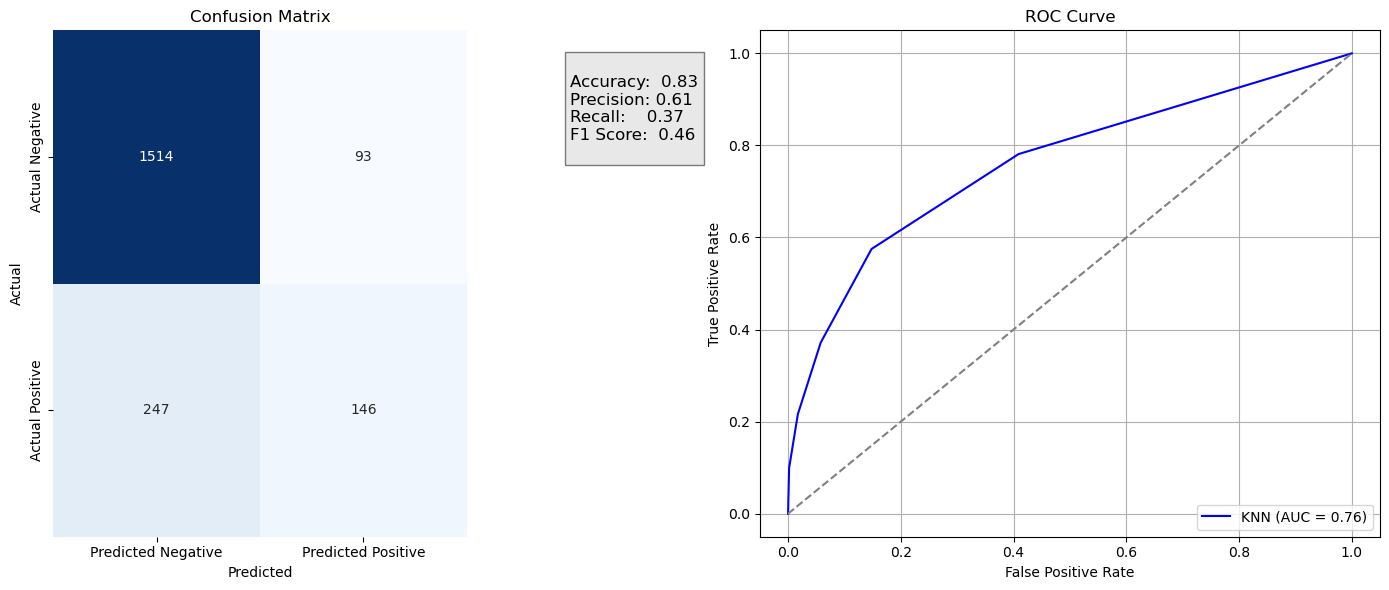

In [7]:
import warnings
from scipy.stats import mode

# Suppress the FutureWarning for mode in KNN
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

# Preprocess data: convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Selecting features and target variable
X = df[['CreditScore', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age', 'Tenure', 'Balance', 
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling to normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix and key metrics
cm = confusion_matrix(y_test, y_pred)

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Start plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 3]})

# Left side: confusion matrix and metrics
# Plot confusion matrix table
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax[0], 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
ax[0].set_title('Confusion Matrix')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

# Add key metrics
metrics_text = f"""
Accuracy:  {accuracy:.2f}
Precision: {precision:.2f}
Recall:    {recall:.2f}
F1 Score:  {f1:.2f}
"""
ax[0].text(2.5, 0.5, metrics_text, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Right side: ROC Curve
ax[1].plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')
ax[1].grid(True)

plt.tight_layout()
plt.show()